In [1]:
# Needed libraries

import requests
import pandas as pd
import numpy as np
import os # if current path is not needed to know; remove
import json
import csv
import eurostat # if we do some fancy thing with APIs; remove
import matplotlib.pyplot as plt

In [2]:
############################
## EMISSIONS DATASET
############################

In [3]:
# Get data "Average CO2 emissions per km from new passenger cars" with eurostat library
df_em = eurostat.get_data_df("sdg_13_31")
print(df_em.head())

  freq geo unit\TIME_PERIOD   2000   2001   2002   2003   2004   2005   2006  \
0    A  AT             G_KM  168.0  165.6  164.4  163.8  161.9  162.1  163.7   
1    A  BE             G_KM  166.5  163.7  161.1  158.1  156.5  155.2  153.9   
2    A  BG             G_KM    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    A  CY             G_KM    NaN    NaN    NaN    NaN  173.4  173.0  170.1   
4    A  CZ             G_KM    NaN    NaN    NaN    NaN  154.0  155.3  154.2   

   ...   2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0  ...  128.5  123.7  120.4  146.3  149.1  152.1  135.7  116.1  112.0  104.1  
1  ...  121.3  117.9  115.9  140.5  144.7  147.3  130.6  117.0  104.5   85.3  
2  ...  135.9  130.3  125.8  153.0  153.6  157.8  147.1  139.5  134.3  130.8  
3  ...  129.8  125.7  123.5  148.1  149.6  153.6  151.9  145.9  136.8  100.4  
4  ...  131.6  126.3  121.2  150.4  152.7  156.0  144.9  138.8  137.7  136.3  

[5 rows x 27 columns]


In [4]:
# Dropping unnecessary columns
df_em = df_em.drop(['freq', 'unit\TIME_PERIOD'], axis=1)
print(df_em.head())

# Explore data
print(df_em.columns)
print(df_em.describe())

# Checking if df_em is a Pandas df
print(type(df_em))
df_em = pd.DataFrame(df_em)
print(df_em.head())

  geo   2000   2001   2002   2003   2004   2005   2006   2007   2008  ...  \
0  AT  168.0  165.6  164.4  163.8  161.9  162.1  163.7  162.9  158.1  ...   
1  BE  166.5  163.7  161.1  158.1  156.5  155.2  153.9  152.8  147.8  ...   
2  BG    NaN    NaN    NaN    NaN    NaN    NaN    NaN  171.6  171.5  ...   
3  CY    NaN    NaN    NaN    NaN  173.4  173.0  170.1  170.3  165.6  ...   
4  CZ    NaN    NaN    NaN    NaN  154.0  155.3  154.2  154.2  154.4  ...   

    2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0  128.5  123.7  120.4  146.3  149.1  152.1  135.7  116.1  112.0  104.1  
1  121.3  117.9  115.9  140.5  144.7  147.3  130.6  117.0  104.5   85.3  
2  135.9  130.3  125.8  153.0  153.6  157.8  147.1  139.5  134.3  130.8  
3  129.8  125.7  123.5  148.1  149.6  153.6  151.9  145.9  136.8  100.4  
4  131.6  126.3  121.2  150.4  152.7  156.0  144.9  138.8  137.7  136.3  

[5 rows x 25 columns]
Index(['geo', '2000', '2001', '2002', '2003', '2004', '2005', '2006', 

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13304\386084851.py:2: SyntaxWarning: invalid escape sequence '\T'
  df_em = df_em.drop(['freq', 'unit\TIME_PERIOD'], axis=1)


In [5]:
# Melting the data such that the seperate column years will become one column: "year"
df_em2 = pd.melt(df_em, id_vars='geo', value_vars=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
                                                   '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020',
                                                   '2021','2022','2023'],
                                       var_name='year', value_name='emissions')

In [6]:
# Sorting values such that countries are together and ordered alphabetically, and within countries the years are sorted chronologically
df_em2 = df_em2.sort_values(by=['geo', 'year'])
print(df_em2)

    geo  year  emissions
0    AT  2001      165.6
30   AT  2002      164.4
60   AT  2003      163.8
90   AT  2004      161.9
120  AT  2005      162.1
..   ..   ...        ...
569  SK  2019      158.0
599  SK  2020      144.6
629  SK  2021      138.0
659  SK  2022      136.8
689  SK  2023      137.6

[690 rows x 3 columns]


In [7]:
############################
## NEW CARS DATASET
############################

In [8]:
# Get data "New passenger cars by type of motor energy" with eurostat library
df_new = eurostat.get_data_df("road_eqr_carpda")
print(df_new.head())

  freq unit mot_nrg geo\TIME_PERIOD  2012    2013    2014    2015    2016  \
0    A   NR     ALT              AL   NaN     NaN     NaN     NaN     NaN   
1    A   NR     ALT              AT   NaN  1285.0  2074.0  2389.0  4317.0   
2    A   NR     ALT              BA   NaN    39.0    46.0    49.0   141.0   
3    A   NR     ALT              BE   NaN   843.0  2234.0  2146.0  4453.0   
4    A   NR     ALT              CH   NaN  2272.0  3012.0  4993.0  4484.0   

     2017    2018     2019     2020     2021     2022     2023  
0     NaN     NaN   3757.0    372.0   5703.0   4114.0   6088.0  
1  5868.0  7406.0   9841.0  16393.0  33466.0  34242.0  47642.0  
2   136.0   101.0    137.0     73.0    229.0    300.0    333.0  
3  5408.0  7931.0  12525.0  18919.0  25866.0  40652.0  97043.0  
4  5704.0  6172.0  14460.0  20378.0  32394.0  40730.0  53031.0  


In [9]:
# Dropping unnecessary columns
df_new = df_new.drop(['freq', 'unit'], axis=1)
print(df_new.head)

# Explore data
print(df_new.columns)
print(df_new.describe())

# Checking if df_em is a Pandas df
print(type(df_new))
df_new = pd.DataFrame(df_new)
print(df_new.head())

<bound method NDFrame.head of        mot_nrg geo\TIME_PERIOD  2012      2013      2014       2015  \
0          ALT              AL   NaN       NaN       NaN        NaN   
1          ALT              AT   NaN    1285.0    2074.0     2389.0   
2          ALT              BA   NaN      39.0      46.0       49.0   
3          ALT              BE   NaN     843.0    2234.0     2146.0   
4          ALT              CH   NaN    2272.0    3012.0     4993.0   
..         ...             ...   ...       ...       ...        ...   
587  PET_X_HYB              SI   NaN   23942.0   23916.0    29038.0   
588  PET_X_HYB              TR   NaN  256479.0  210141.0   270634.0   
589  PET_X_HYB              UA   NaN       NaN       NaN        NaN   
590  PET_X_HYB              UK   NaN       NaN       NaN  1276159.0   
591  PET_X_HYB              XK   NaN       NaN       NaN        NaN   

          2016       2017       2018      2019      2020      2021      2022  \
0          NaN        NaN        NaN 

In [10]:
# Melting the data such that the seperate column years will become one column: "year"
df_new_2 = pd.melt(df_new, id_vars=['geo\TIME_PERIOD', 'mot_nrg'], value_vars=['2012','2013','2014','2015','2016','2017','2018','2019','2020',
                                                                               '2021','2022','2023'],
                                                                   var_name='year', value_name='nr_of_new_cars')

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13304\1970183525.py:2: SyntaxWarning: invalid escape sequence '\T'
  df_new_2 = pd.melt(df_new, id_vars=['geo\TIME_PERIOD', 'mot_nrg'], value_vars=['2012','2013','2014','2015','2016','2017','2018','2019','2020',


In [11]:
# Renaming "geo\TIME_PERIOD" to combat warning messages
df_new_2 = df_new_2.rename(columns={'geo\TIME_PERIOD': 'geo'})
print(df_new_2)

# Sorting values such that countries are together and ordered alphabetically, and
# within countries motor types are together and ordered alphabetically and 
# within motor type, within countries the years are sorted chronologically
df_new_2 = df_new_2.sort_values(by=['geo', 'mot_nrg', 'year'])
print(df_new_2)

# Converting nr_of_new_cars to an integer to enable transforming the variable later on
df_new_2['nr_of_new_cars_2'] = df_new_2['nr_of_new_cars'].astype('Int64')
print(df_new_2)

# Dropping categories, as they are aggregated in "Petrol" and "Diesel". We drop "Alternative energy" as we are interested in its subcategory "Electricity"
df_new_2 = df_new_2[df_new_2["mot_nrg"].isin(["PET_X_HYB", "ELC_PET_HYB", "ELC_PET_PI", "DIE_X_HYB", "ELC_DIE_HYB", "ELC_DIE_PI", "ALT"]) == False]
# Checking if we are left with 17 - 7 = 10 correct categories
print(df_new_2["mot_nrg"].unique())

     geo    mot_nrg  year  nr_of_new_cars
0     AL        ALT  2012             NaN
1     AT        ALT  2012             NaN
2     BA        ALT  2012             NaN
3     BE        ALT  2012             NaN
4     CH        ALT  2012             NaN
...   ..        ...   ...             ...
7099  SI  PET_X_HYB  2023         25198.0
7100  TR  PET_X_HYB  2023        625501.0
7101  UA  PET_X_HYB  2023         28689.0
7102  UK  PET_X_HYB  2023             NaN
7103  XK  PET_X_HYB  2023             NaN

[7104 rows x 4 columns]
     geo    mot_nrg  year  nr_of_new_cars
0     AL        ALT  2012             NaN
592   AL        ALT  2013             NaN
1184  AL        ALT  2014             NaN
1776  AL        ALT  2015             NaN
2368  AL        ALT  2016             NaN
...   ..        ...   ...             ...
4735  XK  PET_X_HYB  2019             0.0
5327  XK  PET_X_HYB  2020             NaN
5919  XK  PET_X_HYB  2021          2615.0
6511  XK  PET_X_HYB  2022             NaN
7103  XK 

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13304\3847137432.py:2: SyntaxWarning: invalid escape sequence '\T'
  df_new_2 = df_new_2.rename(columns={'geo\TIME_PERIOD': 'geo'})


In [12]:
# Subsetting data for only EVs per country per year
df_EV =  df_new_2[df_new_2["mot_nrg"] == "ELC"].reset_index(drop = True)
df_EV = df_EV[["geo", "year", "nr_of_new_cars_2"]]
# Renaming the col to EV specifics in order to avoid confusion later on
df_EV = df_EV.rename(columns={'nr_of_new_cars_2': 'nr_of_new_EVs'})

# Checking if all went well
print(type(df_EV))
df_EV

<class 'pandas.core.frame.DataFrame'>


,geo,year,nr_of_new_EVs
0,AL,2012,<NA>
1,AL,2013,<NA>
2,AL,2014,<NA>
3,AL,2015,<NA>
4,AL,2016,<NA>
...,...,...,...
487,XK,2019,0
488,XK,2020,<NA>
489,XK,2021,20
490,XK,2022,<NA>


In [13]:
# Checking the total amount of cars per country per year
print(df_new_2)
print(df_new_2.groupby(['geo', 'year'])['nr_of_new_cars_2'].sum())

# Calculating total amount of cars per country per year; subsetting into new dataframe
grouped_df = df_new_2.groupby(['geo', 'year'], as_index= False)['nr_of_new_cars_2'].sum()
# Renaming the col to total cars in order to avoid confusion later on
grouped_df = grouped_df.rename(columns={'nr_of_new_cars_2': 'nr_of_new_cars_total'})

# Checking if grouping went well
print(type(grouped_df))
grouped_df

     geo mot_nrg  year  nr_of_new_cars  nr_of_new_cars_2
39    AL  BIFUEL  2012             NaN              <NA>
631   AL  BIFUEL  2013             NaN              <NA>
1223  AL  BIFUEL  2014             NaN              <NA>
1815  AL  BIFUEL  2015             NaN              <NA>
2407  AL  BIFUEL  2016             NaN              <NA>
...   ..     ...   ...             ...               ...
4698  XK     PET  2019             0.0                 0
5290  XK     PET  2020             NaN              <NA>
5882  XK     PET  2021          2840.0              2840
6474  XK     PET  2022             NaN              <NA>
7066  XK     PET  2023             NaN              <NA>

[4284 rows x 5 columns]
geo  year
AL   2012        0
     2013        0
     2014        0
     2015        0
     2016        0
             ...  
XK   2019    22587
     2020        0
     2021    27160
     2022        0
     2023        0
Name: nr_of_new_cars_2, Length: 504, dtype: Int64
<class 'pandas.core.fr

,geo,year,nr_of_new_cars_total
0,AL,2012,0
1,AL,2013,0
2,AL,2014,0
3,AL,2015,0
4,AL,2016,0
...,...,...,...
499,XK,2019,22587
500,XK,2020,0
501,XK,2021,27160
502,XK,2022,0


In [14]:
# Left joining the data on total new cars per country per year and data on new EVs per country per year 
df_full = grouped_df.merge(df_EV, how='left', on=['geo', 'year'])
df_full

,geo,year,nr_of_new_cars_total,nr_of_new_EVs
0,AL,2012,0,<NA>
1,AL,2013,0,<NA>
2,AL,2014,0,<NA>
3,AL,2015,0,<NA>
4,AL,2016,0,<NA>
...,...,...,...,...
499,XK,2019,22587,0
500,XK,2020,0,<NA>
501,XK,2021,27160,20
502,XK,2022,0,<NA>


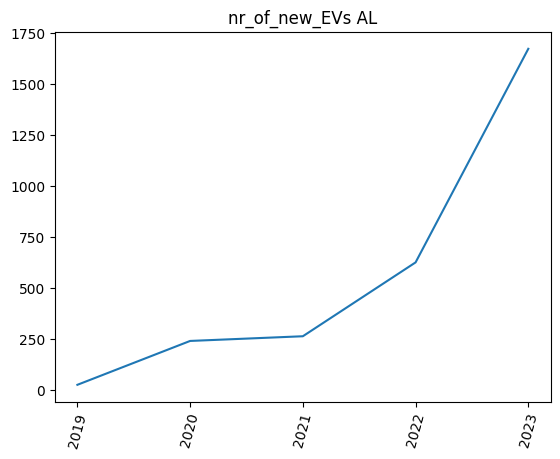

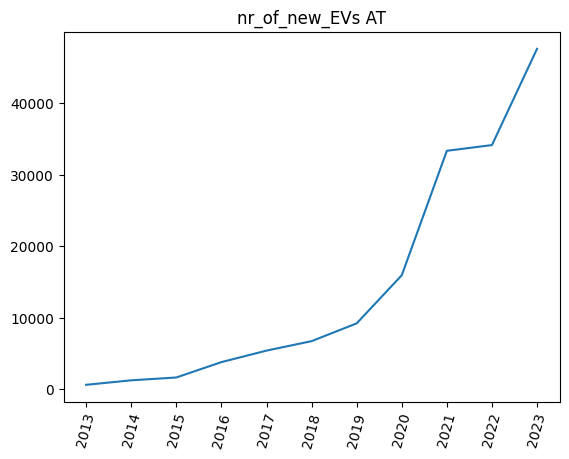

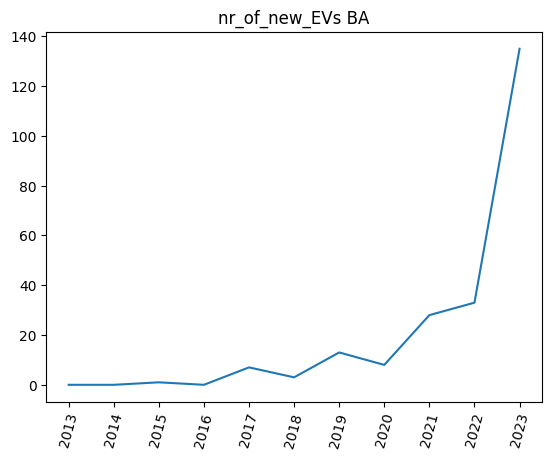

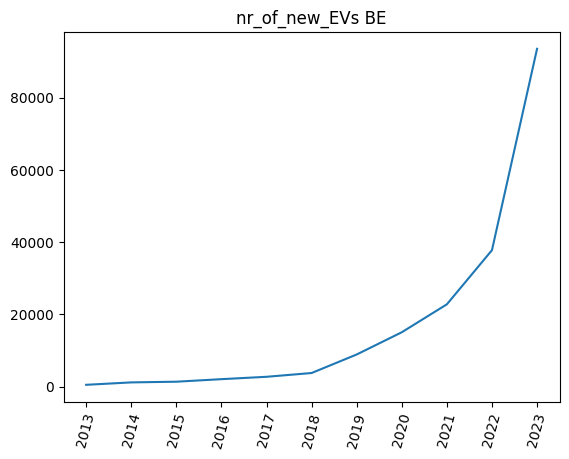

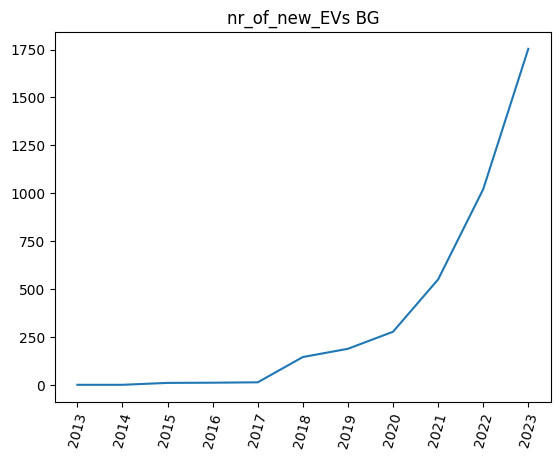

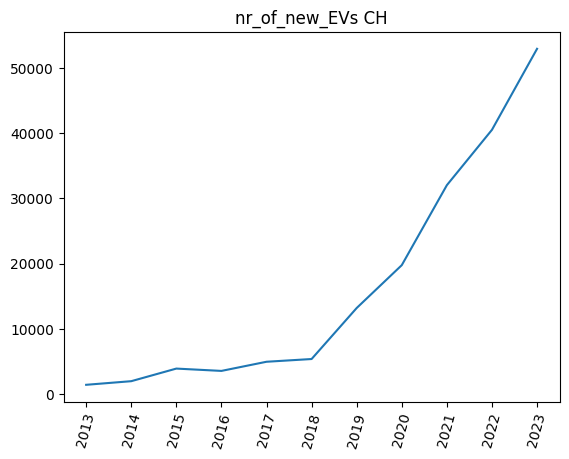

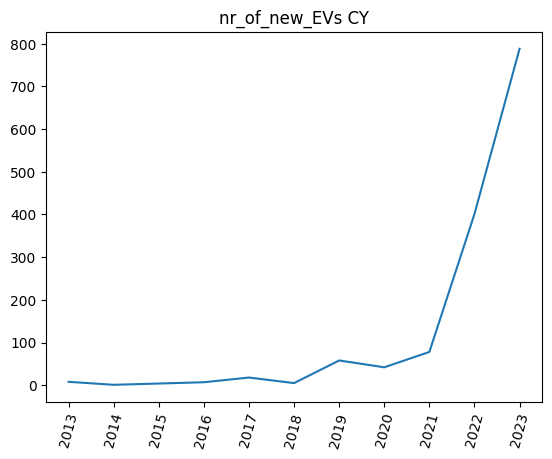

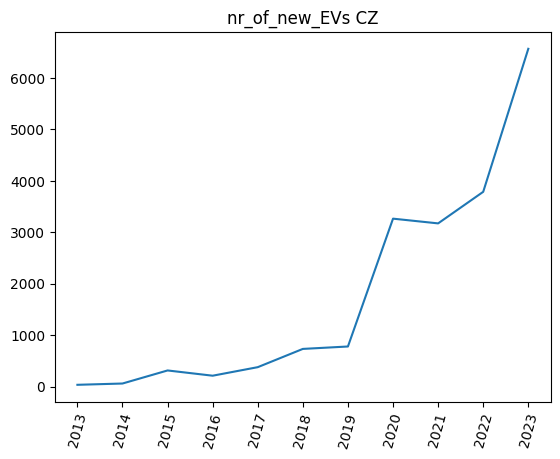

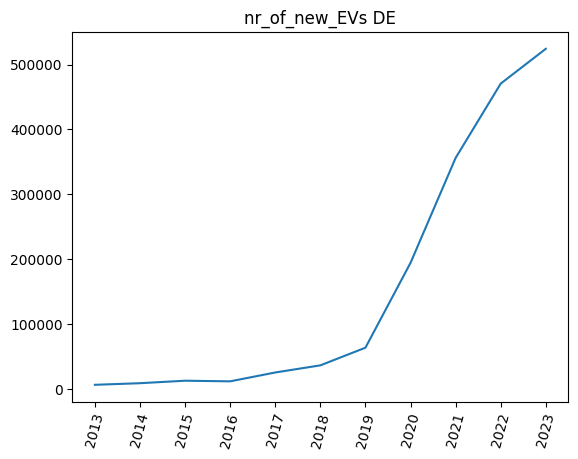

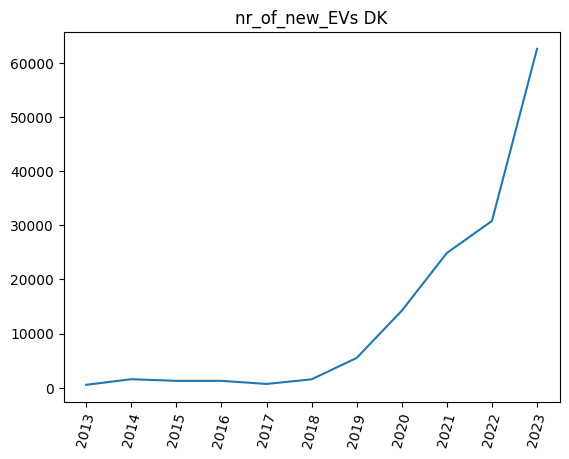

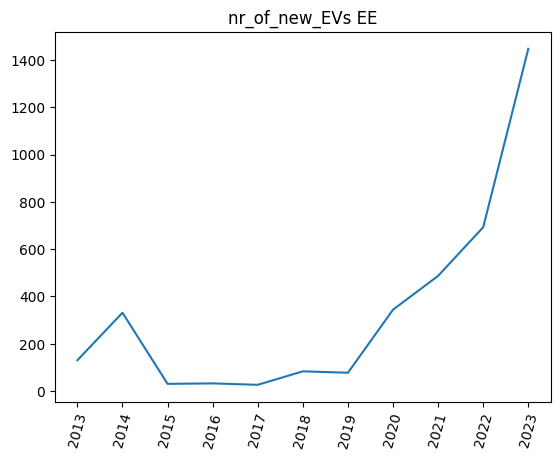

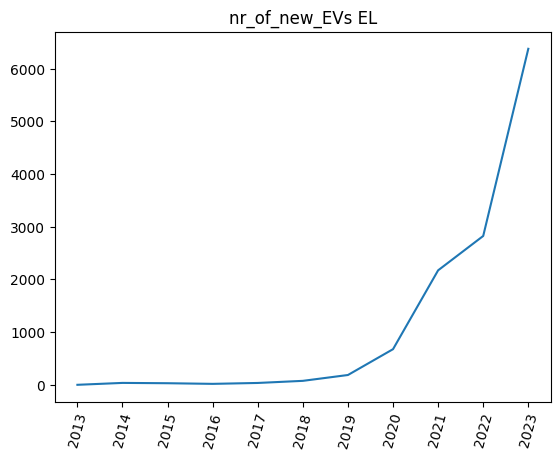

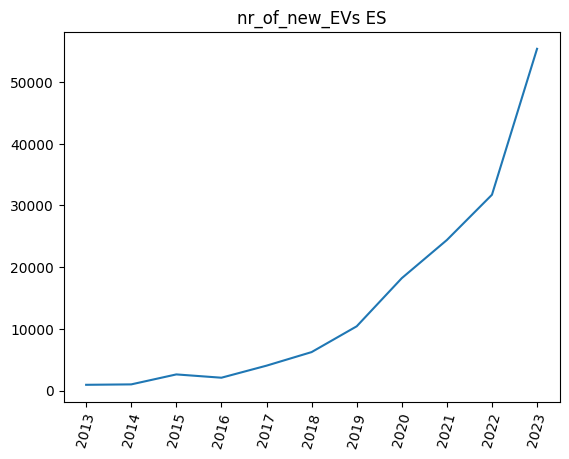

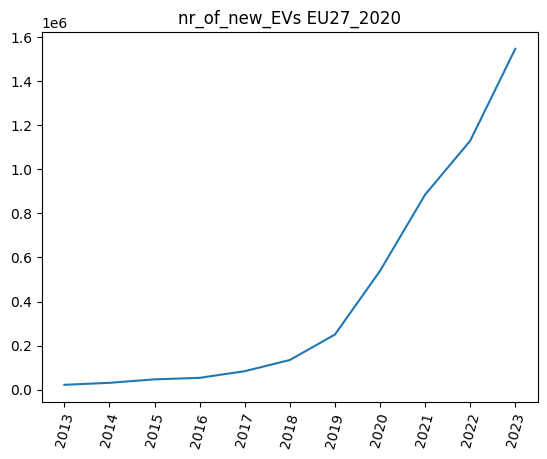

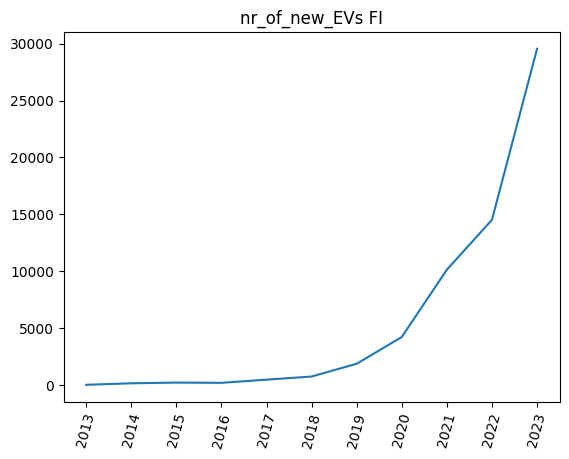

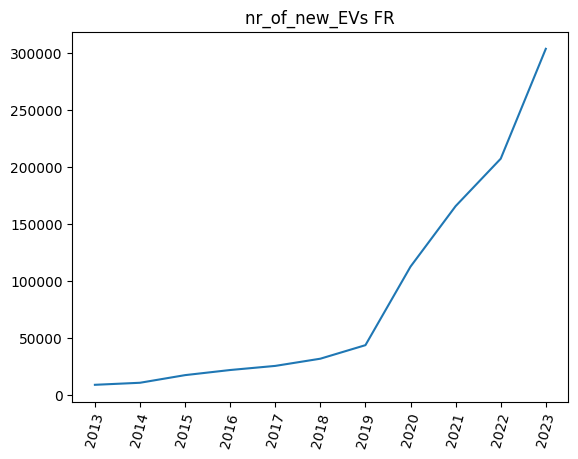

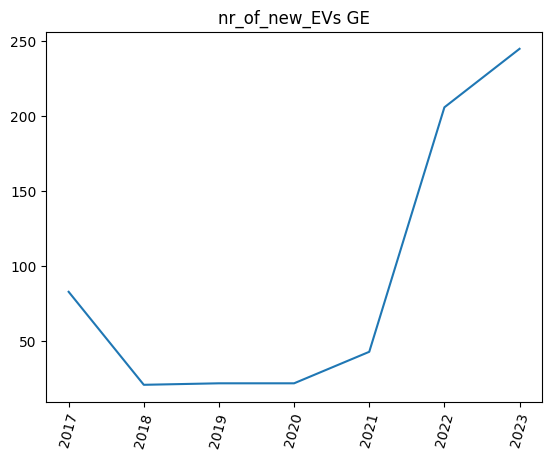

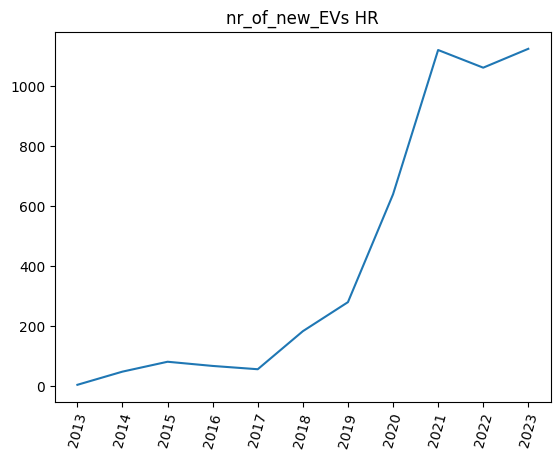

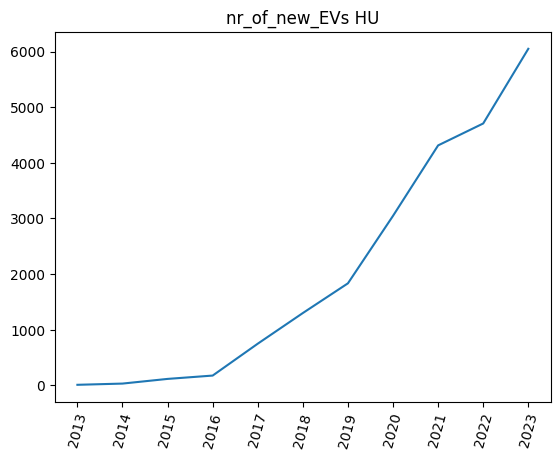

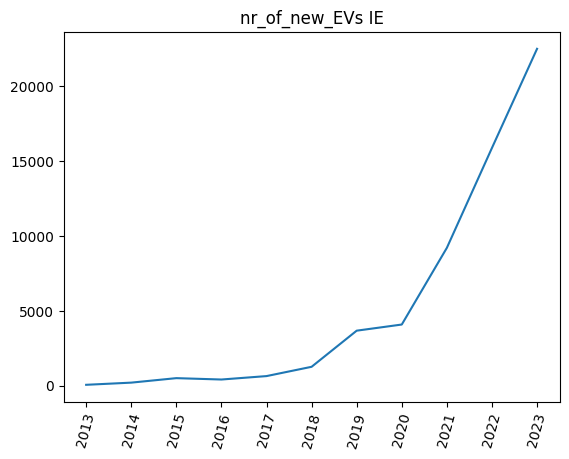

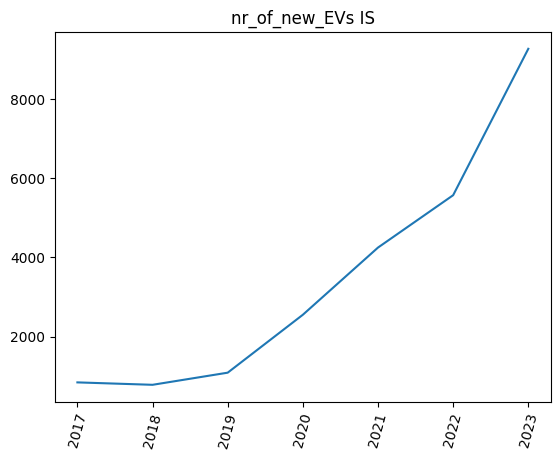

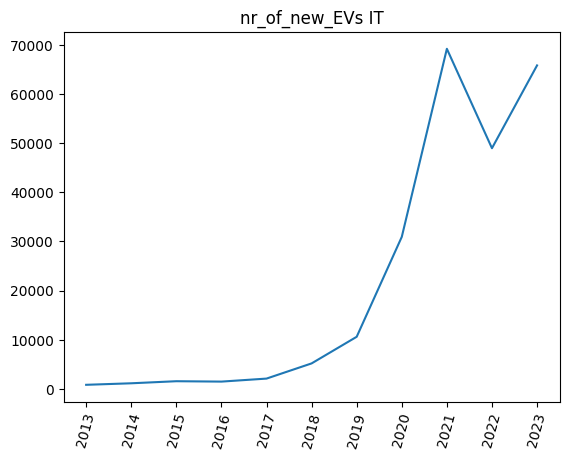

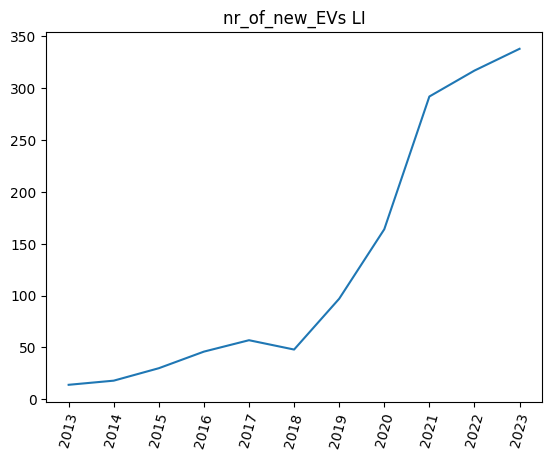

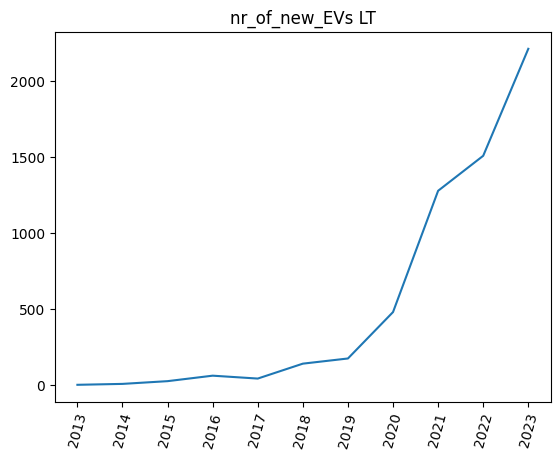

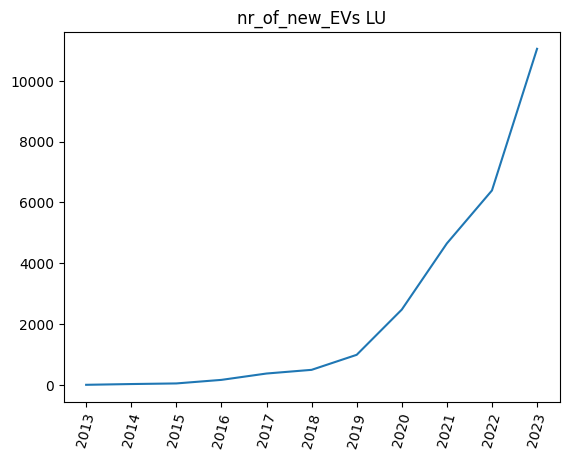

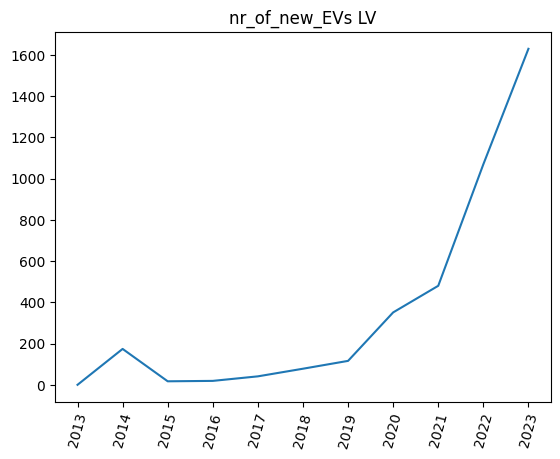

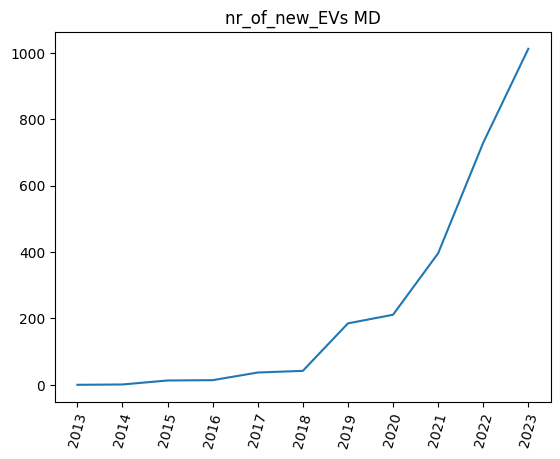

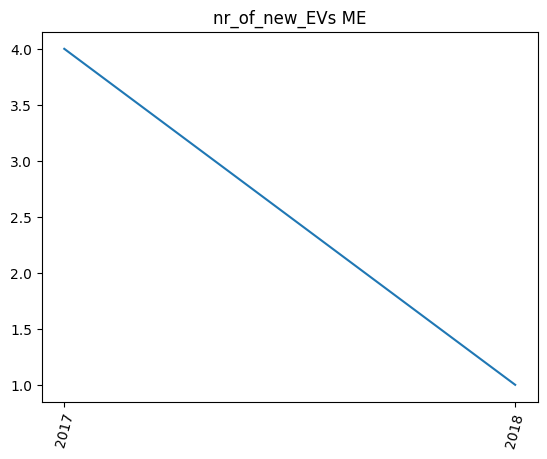

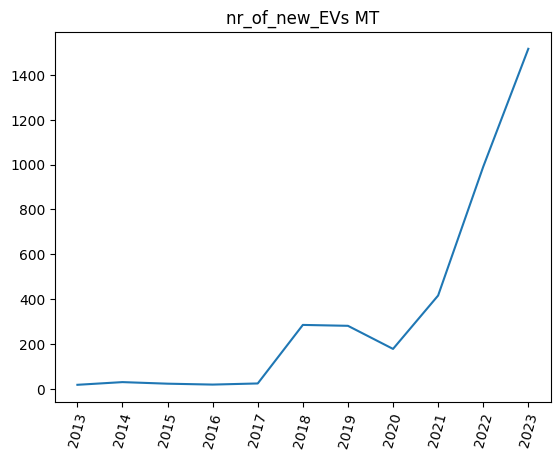

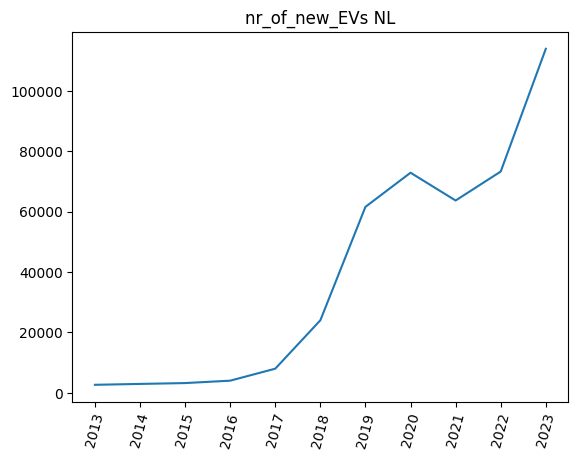

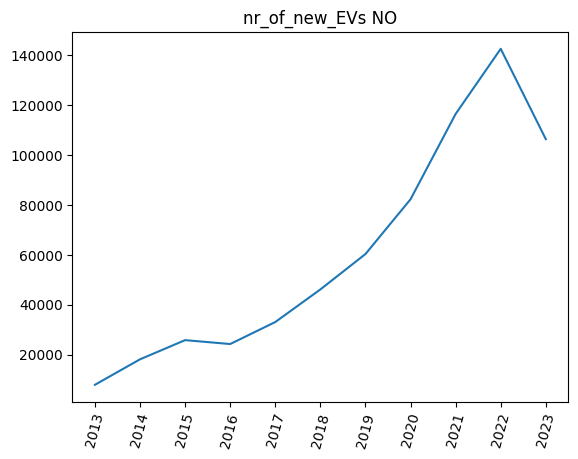

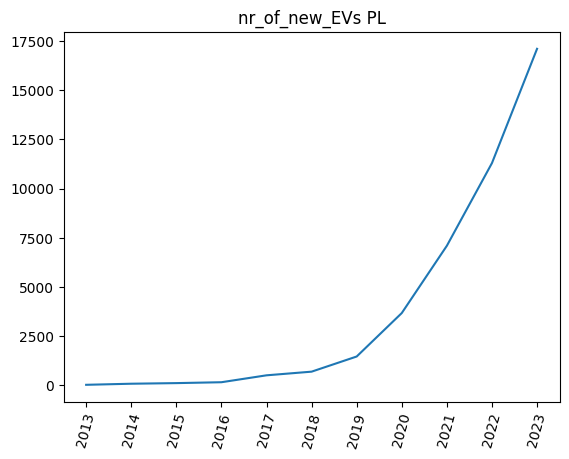

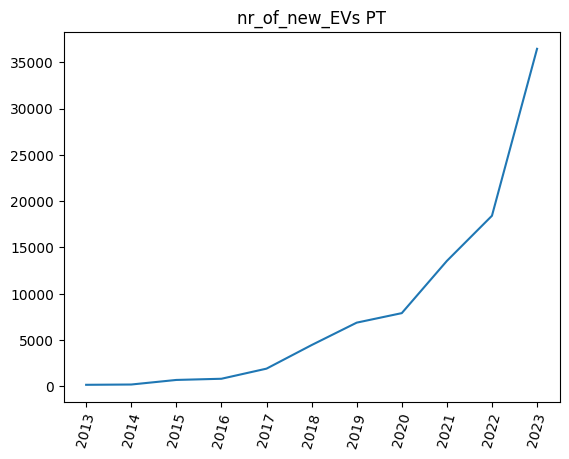

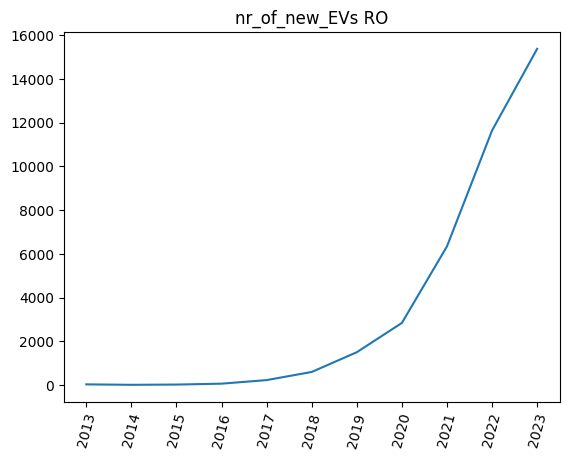

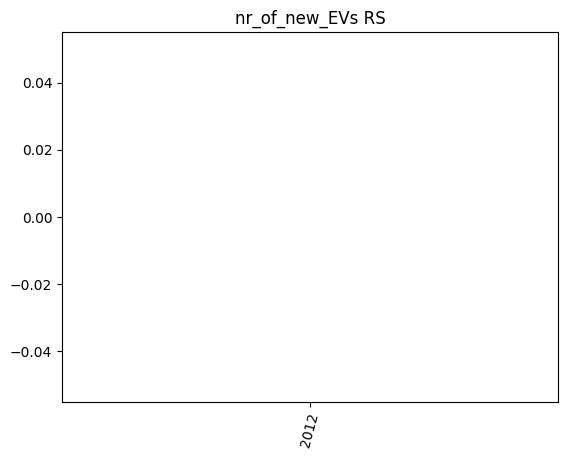

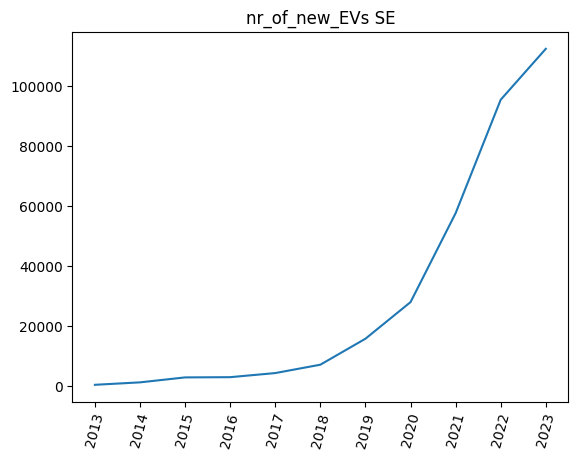

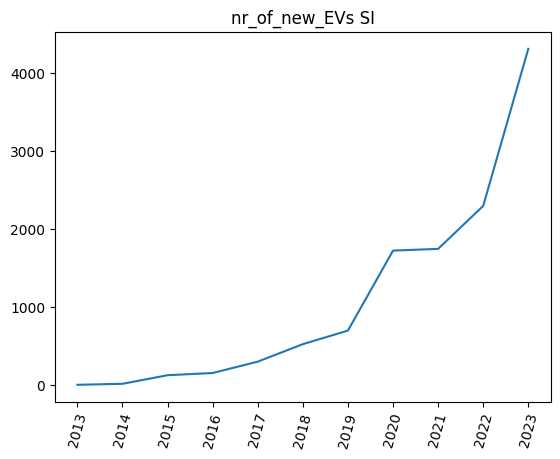

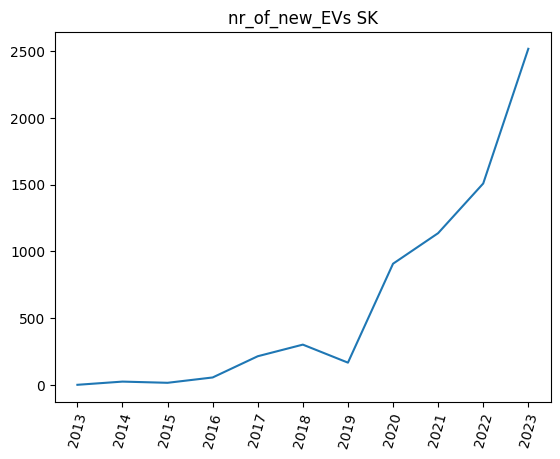

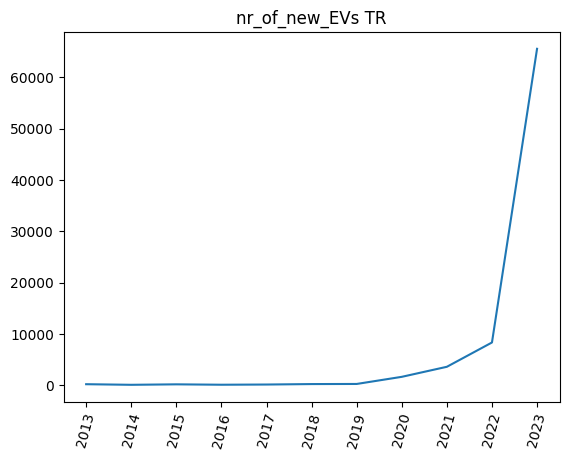

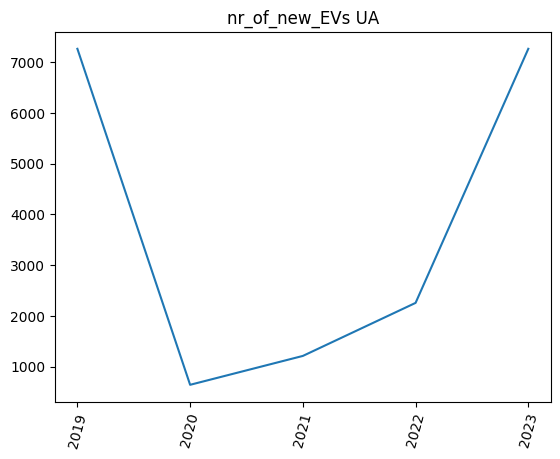

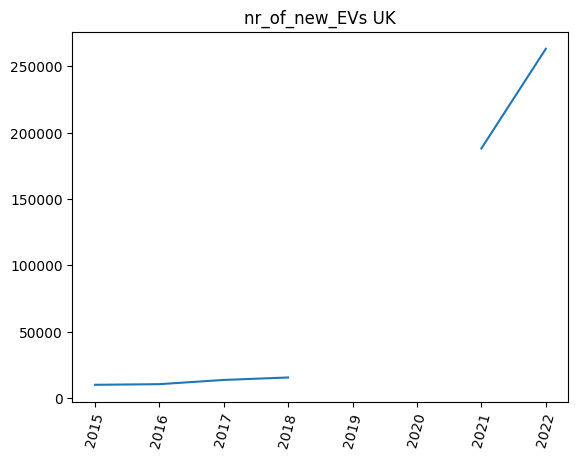

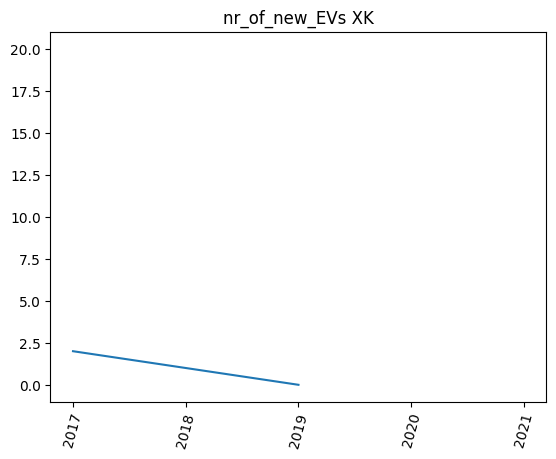

    geo  year  nr_of_new_cars_total  nr_of_new_EVs      p_EVs
288  LU  2012                     0           <NA>       <NA>
289  LU  2013                     0              0        NaN
290  LU  2014                    25             25      100.0
291  LU  2015                    45             45      100.0
292  LU  2016                   162            162      100.0
293  LU  2017                   371            371      100.0
294  LU  2018                   492            492      100.0
295  LU  2019                 55008            986   1.792467
296  LU  2020                 45189           2473   5.472571
297  LU  2021                 44372           4649  10.477328
298  LU  2022                 42094           6391  15.182686
299  LU  2023                 49599          11048  22.274643
     geo    mot_nrg  year  nr_of_new_cars  nr_of_new_cars_2
1242  LU     BIFUEL  2014             NaN              <NA>
1273  LU     BIODIE  2014             NaN              <NA>
1301  LU     B

In [15]:
# REMOVE THIS BIT IF WE ARE NOT GOING TO DO % OTHERWISE ADJUST TO MAKE IT MORE PROFESSIONAL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Calculating and adding new column with % of new cars that are EVs
df_full['p_EVs'] = ((df_full['nr_of_new_EVs'] / df_full['nr_of_new_cars_total']) * 100)
df_full

# Line plot for nr_of_new_EVs for each country per year  BECAUSE -_EVs DID NOT WORK!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
lst = df_full['geo'].unique()
for ls in lst:
    df_full_a = df_full[df_full['geo'] == ls]
    plt.plot('year','nr_of_new_EVs',data=df_full_a)
    plt.title(f'nr_of_new_EVs {ls}')
    plt.xticks(rotation=75)
    plt.show()
    
# Checking where my life went wrong
print(df_full[df_full["geo"] == "LU"])
print(df_new_2[(df_new_2['geo'] == "LU") & (df_new_2["year"] == "2014")])

In [16]:
############################
## BOTH DATASETS
############################

In [17]:
# Left joining the data on emissions per country per year and data on new EVs and total new cars per country per year
df_all = df_em2.merge(df_full, how='left', on=['geo', 'year'])
df_all

,geo,year,emissions,nr_of_new_cars_total,nr_of_new_EVs,p_EVs
0,AT,2001,165.6,<NA>,<NA>,<NA>
1,AT,2002,164.4,<NA>,<NA>,<NA>
2,AT,2003,163.8,<NA>,<NA>,<NA>
3,AT,2004,161.9,<NA>,<NA>,<NA>
4,AT,2005,162.1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...
685,SK,2019,158.0,557,166,29.802513
686,SK,2020,144.6,1851,907,49.00054
687,SK,2021,138.0,1969,1136,57.694261
688,SK,2022,136.8,3207,1508,47.022139


In [18]:
# Cutting the years at 2017, as the metadata states that data is only comparable for 2000 - 2016 and for 2017 - now

# First make year an integer for easier subsetting
df_all['year2'] = df_all['year'].astype('int')
print(np.dtype(df_all['year2']))
print(df_all)

# Subsetting data for years 2000 - 2016
df_00_16 = df_all[df_all['year2'] <= 2016]

# Subsetting data for years 2017 - now
df_17_up = df_all[df_all['year2'] >= 2017]
print(df_17_up.head)

int64
    geo  year  emissions  nr_of_new_cars_total  nr_of_new_EVs      p_EVs  \
0    AT  2001      165.6                  <NA>           <NA>       <NA>   
1    AT  2002      164.4                  <NA>           <NA>       <NA>   
2    AT  2003      163.8                  <NA>           <NA>       <NA>   
3    AT  2004      161.9                  <NA>           <NA>       <NA>   
4    AT  2005      162.1                  <NA>           <NA>       <NA>   
..   ..   ...        ...                   ...            ...        ...   
685  SK  2019      158.0                   557            166  29.802513   
686  SK  2020      144.6                  1851            907   49.00054   
687  SK  2021      138.0                  1969           1136  57.694261   
688  SK  2022      136.8                  3207           1508  47.022139   
689  SK  2023      137.6                  4208           2517  59.814639   

     year2  
0     2001  
1     2002  
2     2003  
3     2004  
4     2005  
.. 

In [19]:
############################
## PLOTS PLOTS PLOTS
############################

In [ ]:
# line plots for each country - emissions only - 2000 up to and including 2016
lst = df_00_16['geo'].unique()
for ls in lst:
    df_16_a = df_00_16[df_00_16['geo'] == ls]
    plt.plot('year2','emissions',data=df_16_a)
    plt.title(f'emissions {ls}')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
# line plots for each country - emissions only - 2017 and up
lst = df_17_up['geo'].unique()
for ls in lst:
    df_17_a = df_17_up[df_17_up['geo'] == ls]
    plt.plot('year2','emissions',data=df_17_a)
    plt.title(f'emissions {ls}')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
# bar plots for each country - emissions only - 2000 up to and including 2016
lst = df_00_16['geo'].unique()
for ls in lst:
    df_16_b = df_00_16[df_00_16['geo'] == ls]
    plt.bar('year','emissions',data=df_16_b)
    plt.title(f'emissions {ls}')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
# bar plots for each country - emissions only - 2017 and up
lst = df_17_up['geo'].unique()
for ls in lst:
    df_17_b = df_17_up[df_17_up['geo'] == ls]
    plt.bar('year','emissions',data=df_17_b)
    plt.title(f'emissions {ls}')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
# Plots for each country - bar plots for emissions + line plots for new EVs - 2000 up to and including 2016
lst = df_00_16['geo'].unique()
for ls in lst:
    df_16_a = df_00_16[df_00_16['geo'] == ls]
    plt.figure()
    plt.bar('year2', 'emissions', data=df_16_a, label='emissions')
    plt.ylabel('emissions')
    
    axes2 = plt.twinx()
    axes2.plot('year2', 'nr_of_new_EVs', data=df_16_a, color='r', label='new EVs')
    axes2.set_ylabel('nr of new EVs')
    
    plt.title(f'emissions and new EVs of {ls}')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
# Plots for each country - bar plots for emissions + line plots for new EVs - 2017 and up
lst = df_17_up['geo'].unique()
for ls in lst:
    df_17_a = df_17_up[df_17_up['geo'] == ls]
    plt.figure()
    plt.bar('year2', 'emissions', data=df_17_a, label='emissions')
    plt.ylabel('emissions')
    
    axes2 = plt.twinx()
    axes2.plot('year2', 'nr_of_new_EVs', data=df_17_a, color='r', label='new EVs')
    axes2.set_ylabel('nr of new EVs')
    
    plt.title(f'emissions and new EVs of {ls}')
    plt.xticks(rotation=75)
    plt.show()